# # Lead Scoring Case Study

In [123]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
leads.shape

(9240, 37)

In [4]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
(leads.isnull().sum()/leads.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Drop the colums that ave misiing values >40%

In [8]:
leads.drop(['Lead Quality', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis =1, inplace = True)
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 32 columns]

In [9]:
(leads.isnull().sum()/leads.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
for col in leads.columns:
    if leads[col].isnull().sum()>3000:
        leads.drop(col,1, inplace=True)

In [11]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Data Cleaning

In [12]:
leads.drop(['Prospect ID','Do Not Call','How did you hear about X Education','Do Not Call','Country', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper'
           ,'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
           'Get updates on DM Content','City', 'I agree to pay the amount through cheque','Lead Profile'],axis=1,inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

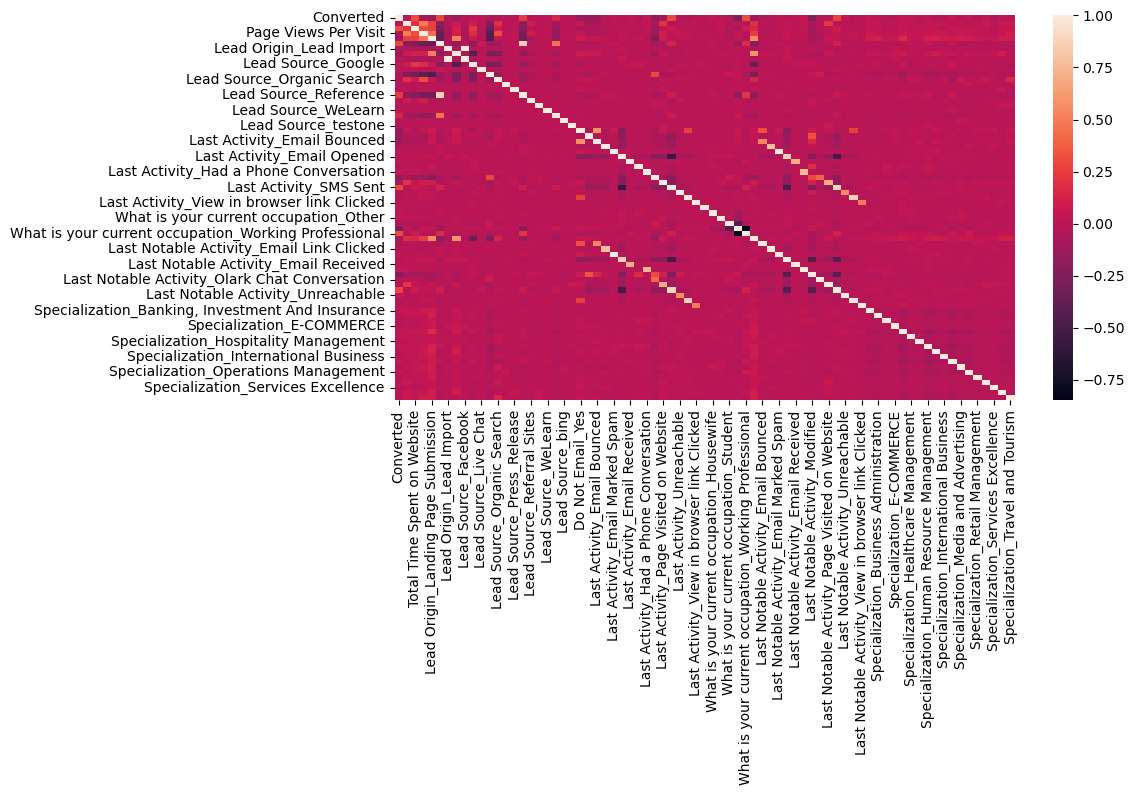

In [120]:
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr())
plt.show()

In [13]:
leads.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [14]:
leads.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [15]:
leads.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [16]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]
leads = leads[~pd.isnull(leads['Lead Source'])]
leads = leads[~pd.isnull(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Specialization'])]
leads = leads[~pd.isnull(leads['Last Activity'])]

In [17]:
leads.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [18]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


In [19]:
leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [20]:
leads.drop('Lead Number',axis=1,inplace=True)

In [21]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

# Data modeling Prepration

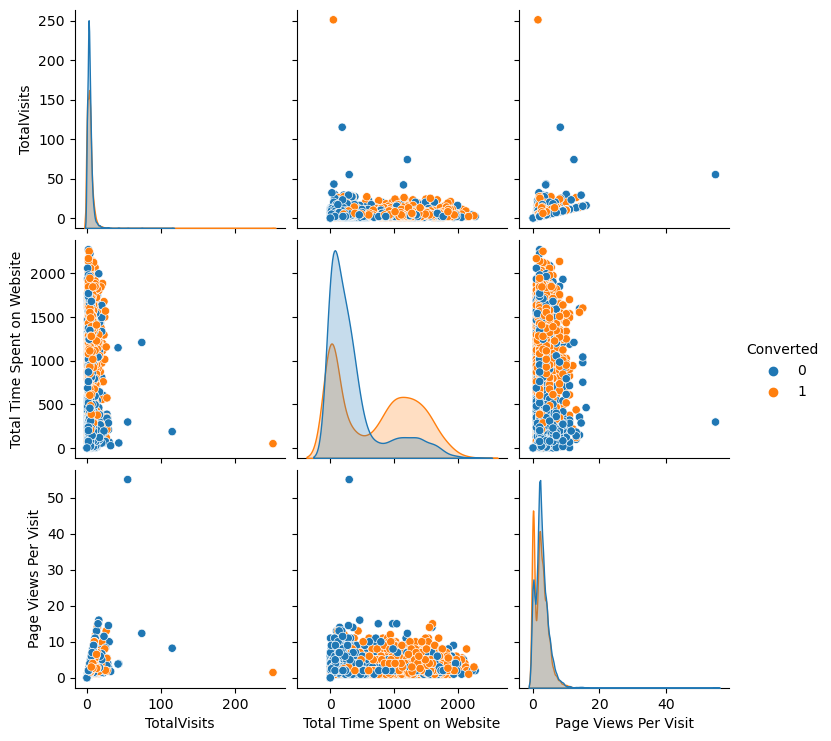

In [22]:
sns.pairplot(leads ,hue='Converted')
plt.show()

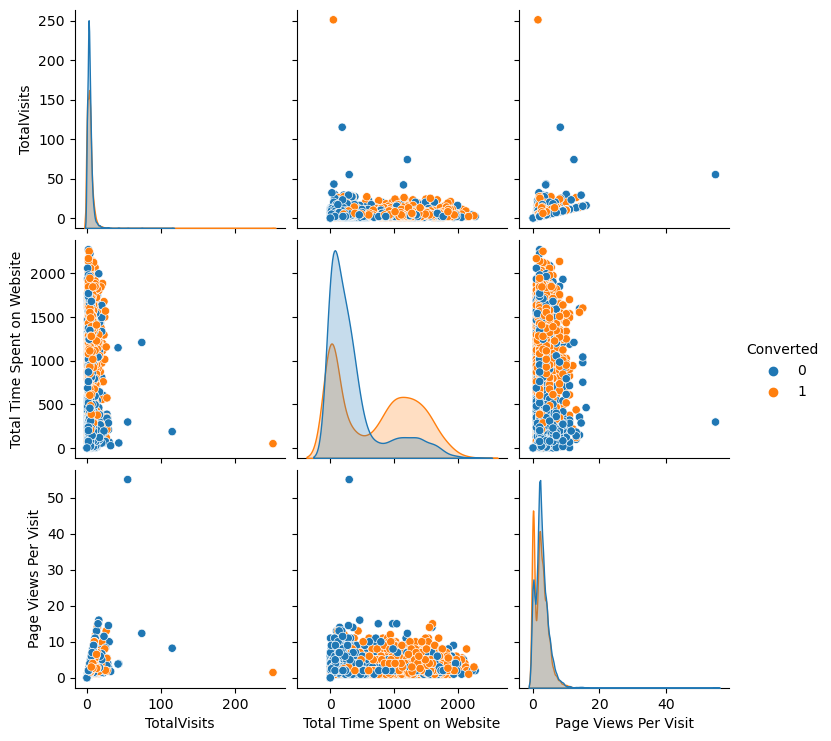

In [23]:
pair = leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
sns.pairplot(pair,hue='Converted')
plt.show()

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedu = pd.DataFrame(pt.fit_transform(pair))
transformedu.columns = pair.columns
transformedu.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
0  -0.962570    -1.539988                    -1.532509             -1.534722
1  -0.962570     0.690854                     0.641870              0.230818
2   1.038885    -0.219742                     1.262512             -0.019004
3  -0.962570    -0.723932                     0.153656             -0.629842
4   1.038885    -0.219742                     1.204175             -0.629842

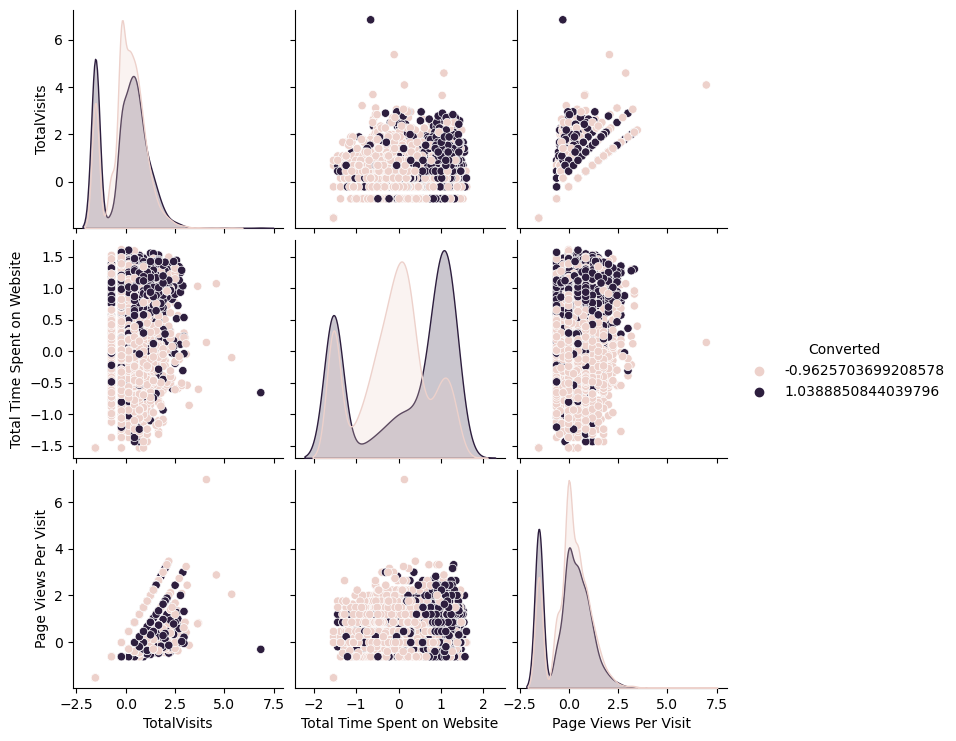

In [25]:
sns.pairplot(transformedu,hue='Converted')
plt.show()

## Dummy variable

In [26]:
temp = leads.loc[:,leads.dtypes=='object']
temp.columnsdummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [27]:
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [28]:
leads=pd.concat([leads,dummy],axis=1)

In [29]:
dummyspl = pd.get_dummies(leads['Specialization'],prefix='Specialization')
dummyspl = dummyspl.drop(['Specialization_Select'],1)
leads = pd.concat([leads,dummyspl],axis=1)

In [30]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  ... Specialization_IT Projects Management  \
0                      Unemployed  ...                                     0   
1                      Unemployed  ...                                     0   
2                         Student  ...                                     0   
3                      Unemployed  ...                                     0   
4                      Unemployed  ...                                     0   

  Specialization_International Business  Specialization_Marketing Management  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 83 columns]

In [31]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [32]:
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 75 columns]

## Test - Train split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=leads.drop(['Converted'],1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                     

In [36]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]=scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
8003                     0                   0                      0  ...   
218                      0                   0                      0  ...   
4171                     0                   0                      0  ...   
4037                     0                   0                      0  ...   
3660                     0                   0                      0  ...   

      Specialization_IT Projects Management  \
8003                                      1   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_International Business  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Marketing Management  \
8003                                    0   
218                                     0   
4171                                    0   
4037                                    0   
3660                                    0   

      Specialization_Media and Advertising  \
8003                                     0   
218                                      0   
4171                                     0   
4037                                     0   
3660                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8003                                     0                                 0   
218                                      0                                 0   
4171                                     0                                 0   
4037                                     0                                 0   
3660                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Services Excellence  \
8003                                   0   
218                                    0   
4171                                   0   
4037                                   0   
3660                                   0   

      Specialization_Supply Chain Management  \
8003                                       0   
218                                        0   
4171             

# Model building

In [41]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(logr,step=15)
rfe = rfe.fit(X_train,y_train)

In [43]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_testone', False, 3),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),

In [44]:
col = X_train.columns[rfe.support_]

# # Evaluation

In [45]:
X_train = X_train[col]

In [46]:
import statsmodels.api as sm

In [47]:
X_train_sm = sm.add_constant(X_train)
logm2 =sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

In [48]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4423
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.9
Date:                Sun, 19 Mar 2023   Deviance:                       3957.8
Time:                        22:53:42   Pearson chi2:                 4.68e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4959      0.631     -0.786      0.432      -1.732       0.740
TotalVisits                                             12.8958      3.348      3.851      0.000       6.333      19.459
Total Time Spent on Website                              4.3832      0.189     23.160      0.000       4.012       4.754
Page Views Per Visit                                    -1.2260      0.455     -2.696      0.007      -2.117      -0.335
Lead Origin_Landing Page Submission                     -0.7950      0.123     -6.457      0.000      -1.036      -0.554
Lead Origin_Lead Add Form                                2.2182      1.172      1.892      0.058      -0.080       4.516
Lead Source_Olark Chat                                   1.1438      0.155      7.363      0.000       0.839       1.448
Lead Source_Reference                                    1.3148      1.193      1.102      0.270      -1.023       3.653
Lead Source_Welingak Website                             3.6811      1.542      2.387      0.017       0.659       6.703
Do Not Email_Yes                                        -1.3566      0.227     -5.966      0.000      -1.802      -0.911
Last Activity_Converted to Lead                         -0.5349      0.238     -2.250      0.024      -1.001      -0.069
Last Activity_Email Bounced                             -1.2784      0.674     -1.897      0.058      -2.599       0.042
Last Activity_Had a Phone Conversation                   1.3418      0.987      1.359      0.174      -0.593       3.277
Last Activity_Olark Chat Conversation                   -0.8223      0.201     -4.096      0.000      -1.216      -0.429
Last Activity_Page Visited on Website                   -0.3634      0.175     -2.072      0.038      -0.707      -0.020
Last Activity_SMS Sent                                   0.9465      0.090     10.485      0.000       0.770       1.123
What is your current occupation_Housewife               22.7588   2.37e+04      0.001      0.999   -4.64e+04    4.65e+04
What is your current occupation_Student                 -1.0434      0.655     -1.593      0.111      -2.327       0.241
What is your current occupation_Unemployed              -1.2139      0.615     -1.973      0.048      -2.420      -0.008
What is your current occupation_Working Professional     1.3469      0.644      2.090      0.037       0.084       2.610
Last Notable Activity_Email Bounced                      1.5722      0.807      1.948      0.051      -0.009       3.154
Last Notable Activity_Email Link Clicked                -0.5988      0.281     -2.130      0.033      -1.150      -0.048
Last Notable Activity_Had a Phone Conversation          22

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i)for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

Features    VIF
4                           Lead Origin_Lead Add Form  84.71
6                               Lead Source_Reference  65.38
7                        Lead Source_Welingak Website  20.08
17         What is your current occupation_Unemployed  10.15
3                 Lead Origin_Landing Page Submission   5.40
2                                Page Views Per Visit   4.64
21     Last Notable Activity_Had a Phone Conversation   2.46
11             Last Activity_Had a Phone Conversation   2.46
1                         Total Time Spent on Website   2.44
18  What is your current occupation_Working Profes...   2.43
5                              Lead Source_Olark Chat   2.27
22                     Last Notable Activity_Modified   2.14
10                        Last Activity_Email Bounced   2.11
0                                         TotalVisits   1.90
14                             Last Activity_SMS Sent   1.89
28                  Specialization_Finance Management   1.69
8                                    Do Not Email_Yes   1.69
30           Specialization_Human Resource Management   1.59
32                Specialization_Marketing Management   1.54
19                Last Notable Activity_Email Bounced   1.43
12              Last Activity_Olark Chat Conversation   1.42
9                     Last Activity_Converted to Lead   1.38
16            What is your current occupation_Student   1.33
33               Specialization_Operations Management   1.33
25             Specialization_Business Administration   1.31
31              Specialization_IT Projects Management   1.29
13              Last Activity_Page Visited on Website   1.27
35             Specialization_Supply Chain Management   1.25
24   Specialization_Banking, Investment And Insurance   1.23
36                  Specialization_Travel and Tourism   1.14
29               Specialization_Healthcare Management   1.12
27                          Specialization_E-COMMERCE   1.08
26                          Specialization_E-Business   1.06
20           Last Notable Activity_Email Link Clicked   1.06
34              Specialization_Rural and Agribusiness   1.06
15          What is your current occupation_Housewife   1.02
23                  Last Notable Activity_Unreachable   1.01

In [51]:
X_train.drop('Lead Source_Reference', axis=1, inplace=True)

In [52]:
logm3 =sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.4
Date:                Sun, 19 Mar 2023   Deviance:                       3958.8
Time:                        22:53:43   Pearson chi2:                 4.66e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4954      0.631     -0.786      0.432      -1.731       0.740
TotalVisits                                             12.8947      3.348      3.851      0.000       6.332      19.458
Total Time Spent on Website                              4.3827      0.189     23.154      0.000       4.012       4.754
Page Views Per Visit                                    -1.2265      0.455     -2.697      0.007      -2.118      -0.335
Lead Origin_Landing Page Submission                     -0.7946      0.123     -6.454      0.000      -1.036      -0.553
Lead Origin_Lead Add Form                                3.4916      0.279     12.516      0.000       2.945       4.038
Lead Source_Olark Chat                                   1.1431      0.155      7.356      0.000       0.839       1.448
Lead Source_Welingak Website                             2.4069      1.038      2.318      0.020       0.372       4.442
Do Not Email_Yes                                        -1.3538      0.227     -5.961      0.000      -1.799      -0.909
Last Activity_Converted to Lead                         -0.5351      0.238     -2.251      0.024      -1.001      -0.069
Last Activity_Email Bounced                             -1.2812      0.674     -1.902      0.057      -2.602       0.039
Last Activity_Had a Phone Conversation                   1.3423      0.987      1.360      0.174      -0.593       3.277
Last Activity_Olark Chat Conversation                   -0.8221      0.201     -4.096      0.000      -1.216      -0.429
Last Activity_Page Visited on Website                   -0.3633      0.175     -2.072      0.038      -0.707      -0.020
Last Activity_SMS Sent                                   0.9462      0.090     10.483      0.000       0.769       1.123
What is your current occupation_Housewife               22.7608   2.37e+04      0.001      0.999   -4.65e+04    4.65e+04
What is your current occupation_Student                 -1.0423      0.655     -1.591      0.112      -2.326       0.241
What is your current occupation_Unemployed              -1.2138      0.615     -1.973      0.048      -2.419      -0.008
What is your current occupation_Working Professional     1.3479      0.644      2.092      0.036       0.085       2.611
Last Notable Activity_Email Bounced                      1.5723      0.807      1.948      0.051      -0.009       3.154
Last Notable Activity_Email Link Clicked                -0.5962      0.281     -2.123      0.034      -1.147      -0.046
Last Notable Activity_Had a Phone Conversation          22.4434   2.11e+04      0.001      0.999   -4.12e+04    4.13e+04
Last Notable Activity_Modified                          -0

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i)for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

Features    VIF
16         What is your current occupation_Unemployed  10.14
3                 Lead Origin_Landing Page Submission   5.40
2                                Page Views Per Visit   4.64
20     Last Notable Activity_Had a Phone Conversation   2.46
10             Last Activity_Had a Phone Conversation   2.46
1                         Total Time Spent on Website   2.43
17  What is your current occupation_Working Profes...   2.43
4                           Lead Origin_Lead Add Form   2.41
5                              Lead Source_Olark Chat   2.26
21                     Last Notable Activity_Modified   2.14
9                         Last Activity_Email Bounced   2.11
0                                         TotalVisits   1.90
13                             Last Activity_SMS Sent   1.89
27                  Specialization_Finance Management   1.69
7                                    Do Not Email_Yes   1.69
29           Specialization_Human Resource Management   1.59
31                Specialization_Marketing Management   1.54
18                Last Notable Activity_Email Bounced   1.43
11              Last Activity_Olark Chat Conversation   1.42
8                     Last Activity_Converted to Lead   1.38
6                        Lead Source_Welingak Website   1.37
32               Specialization_Operations Management   1.33
15            What is your current occupation_Student   1.33
24             Specialization_Business Administration   1.31
30              Specialization_IT Projects Management   1.29
12              Last Activity_Page Visited on Website   1.27
34             Specialization_Supply Chain Management   1.25
23   Specialization_Banking, Investment And Insurance   1.23
35                  Specialization_Travel and Tourism   1.14
28               Specialization_Healthcare Management   1.12
26                          Specialization_E-COMMERCE   1.08
25                          Specialization_E-Business   1.06
19           Last Notable Activity_Email Link Clicked   1.06
33              Specialization_Rural and Agribusiness   1.06
14          What is your current occupation_Housewife   1.02
22                  Last Notable Activity_Unreachable   1.01

In [54]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

In [55]:
logm3 =sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1981.3
Date:                Sun, 19 Mar 2023   Deviance:                       3962.6
Time:                        22:53:44   Pearson chi2:                 4.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4994      0.631     -0.791      0.429      -1.736       0.737
TotalVisits                                             12.9208      3.345      3.863      0.000       6.364      19.477
Total Time Spent on Website                              4.3778      0.189     23.136      0.000       4.007       4.749
Page Views Per Visit                                    -1.2216      0.454     -2.689      0.007      -2.112      -0.331
Lead Origin_Landing Page Submission                     -0.7910      0.123     -6.430      0.000      -1.032      -0.550
Lead Origin_Lead Add Form                                3.4972      0.279     12.534      0.000       2.950       4.044
Lead Source_Olark Chat                                   1.1466      0.155      7.378      0.000       0.842       1.451
Lead Source_Welingak Website                             2.4061      1.038      2.317      0.021       0.371       4.442
Do Not Email_Yes                                        -1.3547      0.227     -5.966      0.000      -1.800      -0.910
Last Activity_Converted to Lead                         -0.5251      0.238     -2.210      0.027      -0.991      -0.059
Last Activity_Email Bounced                             -1.2720      0.674     -1.888      0.059      -2.593       0.049
Last Activity_Had a Phone Conversation                   2.5722      0.805      3.194      0.001       0.994       4.150
Last Activity_Olark Chat Conversation                   -0.8145      0.201     -4.058      0.000      -1.208      -0.421
Last Activity_Page Visited on Website                   -0.3610      0.175     -2.059      0.039      -0.705      -0.017
Last Activity_SMS Sent                                   0.9453      0.090     10.473      0.000       0.768       1.122
What is your current occupation_Housewife               21.7659   1.44e+04      0.002      0.999   -2.82e+04    2.82e+04
What is your current occupation_Student                 -1.0412      0.655     -1.589      0.112      -2.326       0.243
What is your current occupation_Unemployed              -1.2114      0.615     -1.968      0.049      -2.418      -0.005
What is your current occupation_Working Professional     1.3486      0.645      2.092      0.036       0.085       2.612
Last Notable Activity_Email Bounced                      1.5633      0.807      1.937      0.053      -0.019       3.145
Last Notable Activity_Email Link Clicked                -0.5988      0.281     -2.132      0.033      -1.149      -0.048
Last Notable Activity_Modified                          -0.6460      0.104     -6.223      0.000      -0.849      -0.443
Last Notable Activity_Unreachable                        2

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i)for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

Features    VIF
16         What is your current occupation_Unemployed  10.14
3                 Lead Origin_Landing Page Submission   5.40
2                                Page Views Per Visit   4.63
17  What is your current occupation_Working Profes...   2.43
1                         Total Time Spent on Website   2.43
4                           Lead Origin_Lead Add Form   2.41
5                              Lead Source_Olark Chat   2.26
20                     Last Notable Activity_Modified   2.12
9                         Last Activity_Email Bounced   2.11
0                                         TotalVisits   1.90
13                             Last Activity_SMS Sent   1.89
26                  Specialization_Finance Management   1.69
7                                    Do Not Email_Yes   1.69
28           Specialization_Human Resource Management   1.59
30                Specialization_Marketing Management   1.54
18                Last Notable Activity_Email Bounced   1.43
11              Last Activity_Olark Chat Conversation   1.41
8                     Last Activity_Converted to Lead   1.38
6                        Lead Source_Welingak Website   1.37
15            What is your current occupation_Student   1.33
31               Specialization_Operations Management   1.33
23             Specialization_Business Administration   1.31
29              Specialization_IT Projects Management   1.29
12              Last Activity_Page Visited on Website   1.27
33             Specialization_Supply Chain Management   1.25
22   Specialization_Banking, Investment And Insurance   1.23
34                  Specialization_Travel and Tourism   1.14
27               Specialization_Healthcare Management   1.12
25                          Specialization_E-COMMERCE   1.08
24                          Specialization_E-Business   1.06
19           Last Notable Activity_Email Link Clicked   1.06
32              Specialization_Rural and Agribusiness   1.06
14          What is your current occupation_Housewife   1.02
10             Last Activity_Had a Phone Conversation   1.02
21                  Last Notable Activity_Unreachable   1.01

In [57]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace= True)

In [58]:
logm3 =sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1983.8
Date:                Sun, 19 Mar 2023   Deviance:                       3967.6
Time:                        22:53:45   Pearson chi2:                 4.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1501      0.582      0.258      0.797      -0.991       1.292
TotalVisits                                             12.7766      3.335      3.831      0.000       6.241      19.312
Total Time Spent on Website                              4.3758      0.189     23.134      0.000       4.005       4.746
Page Views Per Visit                                    -1.2462      0.454     -2.743      0.006      -2.137      -0.356
Lead Origin_Landing Page Submission                     -0.7812      0.123     -6.357      0.000      -1.022      -0.540
Lead Origin_Lead Add Form                                3.4941      0.279     12.526      0.000       2.947       4.041
Lead Source_Olark Chat                                   1.1410      0.155      7.346      0.000       0.837       1.445
Lead Source_Welingak Website                             2.4035      1.038      2.314      0.021       0.368       4.439
Do Not Email_Yes                                        -1.3602      0.227     -5.983      0.000      -1.806      -0.915
Last Activity_Converted to Lead                         -0.5344      0.237     -2.250      0.024      -1.000      -0.069
Last Activity_Email Bounced                             -1.2750      0.674     -1.893      0.058      -2.595       0.045
Last Activity_Had a Phone Conversation                   2.5694      0.805      3.192      0.001       0.992       4.147
Last Activity_Olark Chat Conversation                   -0.8173      0.201     -4.074      0.000      -1.210      -0.424
Last Activity_Page Visited on Website                   -0.3793      0.175     -2.161      0.031      -0.723      -0.035
Last Activity_SMS Sent                                   0.9432      0.090     10.455      0.000       0.766       1.120
What is your current occupation_Student                 -1.6845      0.611     -2.757      0.006      -2.882      -0.487
What is your current occupation_Unemployed              -1.8538      0.568     -3.262      0.001      -2.967      -0.740
What is your current occupation_Working Professional     0.7062      0.600      1.178      0.239      -0.469       1.881
Last Notable Activity_Email Bounced                      1.5689      0.807      1.945      0.052      -0.012       3.150
Last Notable Activity_Email Link Clicked                -0.5981      0.280     -2.132      0.033      -1.148      -0.048
Last Notable Activity_Modified                          -0.6417      0.104     -6.191      0.000      -0.845      -0.439
Last Notable Activity_Unreachable                        2.3725      0.809      2.933      0.003       0.787       3.958
Specialization_Banking, Investment And Insurance         1

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i)for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

Features    VIF
15         What is your current occupation_Unemployed  10.00
3                 Lead Origin_Landing Page Submission   5.38
2                                Page Views Per Visit   4.62
1                         Total Time Spent on Website   2.42
16  What is your current occupation_Working Profes...   2.41
4                           Lead Origin_Lead Add Form   2.39
5                              Lead Source_Olark Chat   2.25
19                     Last Notable Activity_Modified   2.12
9                         Last Activity_Email Bounced   2.11
0                                         TotalVisits   1.90
13                             Last Activity_SMS Sent   1.89
7                                    Do Not Email_Yes   1.69
25                  Specialization_Finance Management   1.69
27           Specialization_Human Resource Management   1.59
29                Specialization_Marketing Management   1.54
17                Last Notable Activity_Email Bounced   1.43
11              Last Activity_Olark Chat Conversation   1.41
8                     Last Activity_Converted to Lead   1.38
6                        Lead Source_Welingak Website   1.37
30               Specialization_Operations Management   1.33
14            What is your current occupation_Student   1.32
22             Specialization_Business Administration   1.31
28              Specialization_IT Projects Management   1.29
12              Last Activity_Page Visited on Website   1.27
32             Specialization_Supply Chain Management   1.25
21   Specialization_Banking, Investment And Insurance   1.23
33                  Specialization_Travel and Tourism   1.14
26               Specialization_Healthcare Management   1.12
24                          Specialization_E-COMMERCE   1.08
23                          Specialization_E-Business   1.06
31              Specialization_Rural and Agribusiness   1.06
18           Last Notable Activity_Email Link Clicked   1.06
10             Last Activity_Had a Phone Conversation   1.02
20                  Last Notable Activity_Unreachable   1.01

In [60]:
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace= True)
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace= True)
X_train.drop('Page Views Per Visit', axis = 1, inplace= True)

In [61]:
logm3 =sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4429
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2016.7
Date:                Sun, 19 Mar 2023   Deviance:                       4033.4
Time:                        22:53:45   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3817
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1486      0.119    -18.048      0.000      -2.382      -1.915
TotalVisits                                              8.5477      2.720      3.142      0.002       3.216      13.879
Total Time Spent on Website                              4.3823      0.188     23.327      0.000       4.014       4.751
Lead Origin_Lead Add Form                                4.1707      0.262     15.923      0.000       3.657       4.684
Lead Source_Olark Chat                                   1.6631      0.135     12.286      0.000       1.398       1.928
Lead Source_Welingak Website                             2.2261      1.038      2.145      0.032       0.192       4.260
Do Not Email_Yes                                        -1.3981      0.223     -6.266      0.000      -1.835      -0.961
Last Activity_Converted to Lead                         -0.4732      0.236     -2.006      0.045      -0.936      -0.011
Last Activity_Email Bounced                             -1.2758      0.669     -1.906      0.057      -2.588       0.036
Last Activity_Had a Phone Conversation                   2.5770      0.804      3.205      0.001       1.001       4.153
Last Activity_Olark Chat Conversation                   -0.7290      0.198     -3.679      0.000      -1.117      -0.341
Last Activity_Page Visited on Website                   -0.3204      0.171     -1.870      0.062      -0.656       0.016
Last Activity_SMS Sent                                   0.8841      0.089      9.929      0.000       0.710       1.059
What is your current occupation_Student                  0.1398      0.228      0.613      0.540      -0.307       0.587
What is your current occupation_Working Professional     2.5542      0.202     12.648      0.000       2.158       2.950
Last Notable Activity_Email Bounced                      1.5950      0.803      1.987      0.047       0.022       3.168
Last Notable Activity_Email Link Clicked                -0.6233      0.277     -2.248      0.025      -1.167      -0.080
Last Notable Activity_Modified                          -0.6295      0.103     -6.132      0.000      -0.831      -0.428
Last Notable Activity_Unreachable                        2.4313      0.810      3.002      0.003       0.844       4.019
Specialization_Banking, Investment And Insurance         0.7679      0.213      3.607      0.000       0.351       1.185
Specialization_Business Administration                   0.2771      0.184      1.507      0.132      -0.083       0.637
Specialization_E-Business                                0.4435      0.459      0.966      0.334      -0.457       1.344
Specialization_E-COMMERCE                                0

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i)for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

Features   VIF
7                         Last Activity_Email Bounced  2.09
1                         Total Time Spent on Website  2.00
16                     Last Notable Activity_Modified  1.97
5                                    Do Not Email_Yes  1.68
11                             Last Activity_SMS Sent  1.66
2                           Lead Origin_Lead Add Form  1.61
0                                         TotalVisits  1.60
14                Last Notable Activity_Email Bounced  1.43
9               Last Activity_Olark Chat Conversation  1.38
4                        Lead Source_Welingak Website  1.35
6                     Last Activity_Converted to Lead  1.31
10              Last Activity_Page Visited on Website  1.26
22                  Specialization_Finance Management  1.26
3                              Lead Source_Olark Chat  1.25
13  What is your current occupation_Working Profes...  1.24
26                Specialization_Marketing Management  1.23
24           Specialization_Human Resource Management  1.23
27               Specialization_Operations Management  1.13
19             Specialization_Business Administration  1.13
29             Specialization_Supply Chain Management  1.11
18   Specialization_Banking, Investment And Insurance  1.10
25              Specialization_IT Projects Management  1.09
30                  Specialization_Travel and Tourism  1.06
23               Specialization_Healthcare Management  1.05
12            What is your current occupation_Student  1.04
15           Last Notable Activity_Email Link Clicked  1.04
21                          Specialization_E-COMMERCE  1.03
28              Specialization_Rural and Agribusiness  1.03
20                          Specialization_E-Business  1.02
17                  Last Notable Activity_Unreachable  1.01
8              Last Activity_Had a Phone Conversation  1.01

In [63]:

y_train_pred= res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.315462
218     0.114062
4171    0.074552
4037    0.380958
3660    0.960636
207     0.096416
2044    0.078164
6411    0.928559
6498    0.023458
2085    0.985911
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31546222, 0.11406229, 0.07455218, 0.38095816, 0.96063626,
       0.09641637, 0.07816402, 0.92855937, 0.02345837, 0.98591124])

In [65]:
y_train_pred_final = pd.DataFrame({'Coverted':y_train.values ,'Conversion_prob':y_train_pred})
y_train_pred_final.head()

Coverted  Conversion_prob
0         0         0.315462
1         0         0.114062
2         1         0.074552
3         1         0.380958
4         1         0.960636

In [66]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x : 1 if x>0.5 else 0)

y_train_pred_final.head()

Coverted  Conversion_prob  Predicted
0         0         0.315462          0
1         0         0.114062          0
2         1         0.074552          0
3         1         0.380958          0
4         1         0.960636          1

In [67]:
from sklearn import metrics

In [68]:
confusion = metrics.confusion_matrix(y_train_pred_final.Coverted,y_train_pred_final.Predicted)
print(confusion)

[[1927  385]
 [ 550 1599]]


In [69]:
print (metrics.accuracy_score(y_train_pred_final.Coverted,y_train_pred_final.Predicted))

0.790405738623627


In [70]:
# lets check the True Metrics
Tp=confusion[1,1]
Fp=confusion[0,1]
Tn=confusion[0,0]
Fn=confusion[1,0]

In [71]:
# calculate the sensitivity
Tp/(Tp+Fn)

0.7440670079106562

In [72]:
# calculate the specificity
Tn/(Tn+Fp)

0.8334775086505191

# Roc Curve

In [73]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, label = 'ROC curve(area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristi example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [74]:
fpr, tpr, thresholds =metrics.roc_curve(y_train_pred_final.Coverted, y_train_pred_final.Conversion_prob,drop_intermediate=False)

In [75]:
import matplotlib.pyplot as plt

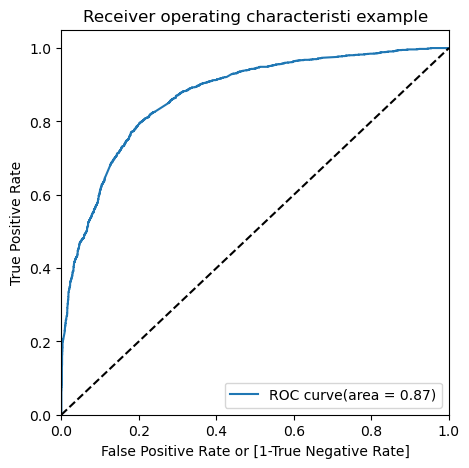

In [76]:
draw_roc(y_train_pred_final.Coverted, y_train_pred_final.Conversion_prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [77]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Coverted  Conversion_prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         0         0.315462          0    1    1    1    1    0    0    0   
1         0         0.114062          0    1    1    0    0    0    0    0   
2         1         0.074552          0    1    0    0    0    0    0    0   
3         1         0.380958          0    1    1    1    1    0    0    0   
4         1         0.960636          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [78]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    col1 = metrics.confusion_matrix(y_train_pred_final.Coverted, y_train_pred_final[i] )
    total1=sum(sum(col1))
    accuracy = (col1[0,0]+col1[1,1])/total1
    
    speci = col1[0,0]/(col1[0,0]+col1[0,1])
    sensi = col1[1,1]/(col1[1,0]+col1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.575880  0.984644  0.195934
0.2   0.2  0.701412  0.948813  0.471453
0.3   0.3  0.768662  0.895765  0.650519
0.4   0.4  0.792872  0.813867  0.773356
0.5   0.5  0.790406  0.744067  0.833478
0.6   0.6  0.771576  0.646347  0.887976
0.7   0.7  0.744004  0.559330  0.915657
0.8   0.8  0.716880  0.462075  0.953720
0.9   0.9  0.659942  0.312704  0.982699


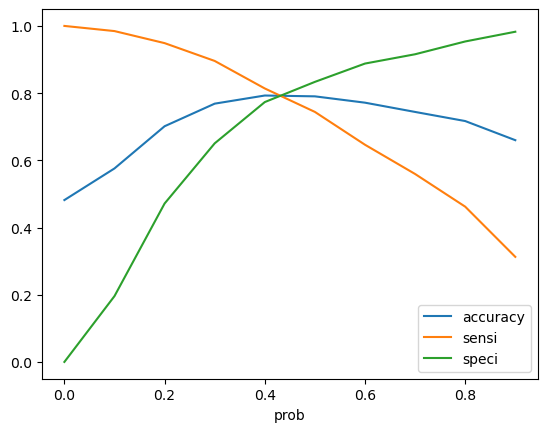

In [79]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [80]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()


Coverted  Conversion_prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         0         0.315462          0    1    1    1    1    0    0    0   
1         0         0.114062          0    1    1    0    0    0    0    0   
2         1         0.074552          0    1    0    0    0    0    0    0   
3         1         0.380958          0    1    1    1    1    0    0    0   
4         1         0.960636          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [81]:
metrics.accuracy_score(y_train_pred_final.Coverted,y_train_pred_final.final_predicted)

0.7953373683030711

# Making Predictions on the Test Set

In [83]:
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [84]:
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771     0.000000                     0.000000                0.0000   
6122     0.027888                     0.029049                0.4375   
9202     0.015936                     0.416813                0.2500   
6570     0.011952                     0.378961                0.1875   
2668     0.031873                     0.395246                0.2500   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Converted to Lead  ...  Specialization_E-COMMERCE  \
4771                                0  ...                          0   
6122                                0  ...                          0   
9202                                0  ...                          0   
6570                                0  ...                          0   
2668                                0  ...                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
4771                                  0                                     0   
6122                                  0                                     0   
9202                                  1                                     0   
6570                                  0                                     0   
2668                                  0                                     0   

      Specialization_Human Resource Management  \
4771                                         0   
6122                                         1   
9202                                         0   
6570                                         0   
2668                                         0   

      Specialization_IT Projects Management  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Marketing Management  \
4771                                    0   
6122                                    0   
9202                                    0   
6570                                    0   
2668                                    0   

      Specialization_Operations Management  \
4771                                     1   
6122                                     0   
9202                                     0   
6570                                     0   
2668                                     0   

      Specialization_Rural and Agribusiness  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Supply Chain Management  \
4771                                       0   
6122                               

In [85]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771    1.0     0.000000                     0.000000               0.00000   
6122    1.0     0.027888                     0.029049               0.43750   
9202    1.0     0.015936                     0.416813               0.25000   
6570    1.0     0.011952                     0.378961               0.18750   
2668    1.0     0.031873                     0.395246               0.25000   
...     ...          ...                          ...                   ...   
5828    1.0     0.011952                     0.027289               0.09375   
6583    1.0     0.011952                     0.152289               0.18750   
5531    1.0     0.055777                     0.702025               0.87500   
3056    1.0     0.011952                     0.417694               0.18750   
4088    1.0     0.019920                     0.530370               0.31250   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   
...                                   ...                        ...   
5828                                    1                          0   
6583                                    1                          0   
5531                                    1                          0   
3056                                    0                          0   
4088                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   
...                      ...                    ...   
5828                       0                      0   
6583                       0                      0   
5531                       0                      0   
3056                       0                      0   
4088                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  ...  \
4771                             0                 0  ...   
6122                             0                 0  ...   
9202                             0                 0  ...   
6570                             0                 1  ...   
2668                             0                 0  ...   
...                            ...               ...  ...   
5828                             0                 0  ...   
6583                             0                 0  ...   
5531                             0                 0  ...   
3056                             0                 1  ...   
4088                             0                 0  ...   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
4771                          0                                  0   
6122                          0                                  0   
9202                          0                                  1   
6570                          0                                  0   
2668                          0                                  0   
...                         ...                                ...   
5828                          0                                  0   
6583                          0                                  0   
5531                          0                                  0   
3056                          0                                  0   
4088                        

In [86]:
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [93]:
logm3 =sm.GLM(y_test,(sm.add_constant(X_test)), family=sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 1912
Model:                            GLM   Df Residuals:                     1878
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -853.51
Date:                Sun, 19 Mar 2023   Deviance:                       1707.0
Time:                        23:28:07   Pearson chi2:                 1.96e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.5494      0.332      1.655      0.098      -0.101       1.200
TotalVisits                                         11.0903      5.036      2.202      0.028       1.220      20.961
Total Time Spent on Website                          4.6456      0.301     15.421      0.000       4.055       5.236
Page Views Per Visit                                -1.1127      0.654     -1.701      0.089      -2.395       0.169
Lead Origin_Landing Page Submission                 -0.6169      0.190     -3.243      0.001      -0.990      -0.244
Lead Origin_Lead Add Form                            2.5865      0.345      7.498      0.000       1.910       3.263
Lead Source_Olark Chat                               1.4183      0.239      5.930      0.000       0.949       1.887
Lead Source_Welingak Website                         2.6562      1.091      2.434      0.015       0.517       4.795
Do Not Email_Yes                                    -1.1650      0.328     -3.554      0.000      -1.807      -0.523
Last Activity_Converted to Lead                     -1.3082      0.414     -3.156      0.002      -2.121      -0.496
Last Activity_Email Bounced                         -1.2448      0.943     -1.320      0.187      -3.093       0.604
Last Activity_Had a Phone Conversation               0.8070      1.302      0.620      0.535      -1.744       3.358
Last Activity_Olark Chat Conversation               -1.5348      0.315     -4.869      0.000      -2.153      -0.917
Last Activity_Page Visited on Website               -0.7658      0.287     -2.668      0.008      -1.328      -0.203
Last Activity_SMS Sent                               1.1017      0.137      8.066      0.000       0.834       1.369
What is your current occupation_Student             -2.6782      0.429     -6.241      0.000      -3.519      -1.837
What is your current occupation_Unemployed          -2.3140      0.271     -8.524      0.000      -2.846      -1.782
Last Notable Activity_Email Bounced                  0.4210      1.309      0.321      0.748      -2.145       2.987
Last Notable Activity_Email Link Clicked             0.1293      0.515      0.251      0.802      -0.881       1.139
Last Notable Activity_Modified                      -0.4208      0.159     -2.647      0.008      -0.732      -0.109
Last Notable Activity_Unreachable                   21.7021   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
Specialization_Banking, Investment And Insurance     0.4193      0.315      1.331      0.183      -0.198       1.037
Specialization_Business Administration               0.2208      0.333      0.662      0.508      -0.433       0.874
Specialization_E-Business                

In [95]:
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.992465
6122    0.134812
9202    0.760682
6570    0.368280
2668    0.709986
4233    0.924539
3368    0.811590
9091    0.376614
5972    0.231124
3631    0.835793
dtype: float64

In [97]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4771  0.992465
6122  0.134812
9202  0.760682
6570  0.368280
2668  0.709986

In [98]:
y_test_df = pd.DataFrame(y_test)

In [99]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [100]:
y_pred_final = pd.concat([y_test_df , y_pred_1],axis=1)

In [101]:
y_pred_final.head()

Converted         0
0          1  0.992465
1          0  0.134812
2          0  0.760682
3          1  0.368280
4          1  0.709986

In [102]:
y_pred_final = y_pred_final.rename(columns={0:'Conversion'})

In [105]:
y_pred_final.head()

Converted  Conversion_prob
0          1         0.992465
1          0         0.134812
2          0         0.760682
3          1         0.368280
4          1         0.709986

In [107]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x:1 if x>0.42 else 0)

In [108]:
y_pred_final.head()

Converted  Conversion_prob  final_predicted
0          1         0.992465                1
1          0         0.134812                0
2          0         0.760682                1
3          1         0.368280                0
4          1         0.709986                1

In [109]:
metrics.accuracy_score(y_pred_final['Converted'],y_pred_final.final_predicted)

0.7829497907949791

In [115]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
confusion2

array([[767, 229],
       [186, 730]], dtype=int64)

In [117]:
Tp = confusion2[1,1]
Tn = confusion2[0,0]
Fp = confusion2[0,1]
Fn = confusion2[1,0]

In [118]:
# precision
Tp/(Tp+Fp)

0.7612095933263816

In [119]:
# Recall
Tp/(Tp+Fn)

0.7969432314410481

# Conclusion`